In [81]:
# Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). 
# В первой колонке файла с данными записано, была или нет реакция. 
# Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. 
import pandas as pd
import numpy as np
data = pd.read_csv("data\\gbm-data.csv")
data[:5]

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Разбейте выборку на обучающую и тестовую, 
# используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.
from sklearn.model_selection import train_test_split
y = data['Activity']
X = data.drop('Activity', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [83]:
X_train[:5]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
776,0.066700,0.502087,0.00,0.0,0.139318,0.599945,0.379030,0.585445,0.685130,0.372628,...,0,0,0,0,0,0,0,0,0,0
3421,0.033300,0.445227,0.00,0.0,0.359760,0.752562,0.234042,0.504428,0.850419,0.145420,...,0,0,0,0,0,0,0,0,0,0
2663,0.066700,0.594110,0.05,0.0,0.132102,0.645920,0.331572,0.511633,0.760417,0.334651,...,0,0,0,0,0,0,0,0,0,0
2749,0.133333,0.584564,0.00,0.0,0.097500,0.771798,0.258248,0.523845,0.755389,0.281245,...,0,0,0,0,0,0,0,0,0,0
2098,0.233333,0.584210,0.00,0.0,0.115112,0.747568,0.278127,0.485389,0.808548,0.270879,...,0,0,0,0,1,1,0,0,1,0


In [84]:
X_test[:5]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
3330,0.066700,0.565660,0.05,0.0,0.140825,0.674149,0.295776,0.525129,0.771678,0.320820,...,0,0,0,0,0,0,0,0,0,0
1793,0.433333,0.565119,0.05,0.0,0.809177,0.799307,0.134365,0.327814,0.868173,0.101438,...,0,0,0,0,0,0,0,0,0,0
2594,0.066700,0.570736,0.10,0.0,0.048200,0.858817,0.092200,0.384102,0.925339,0.032900,...,0,0,0,0,0,0,0,0,0,0
1903,0.033300,0.704610,0.15,0.0,0.171629,0.676769,0.393687,0.613267,0.745727,0.370541,...,0,0,0,0,0,0,0,0,0,0
3354,0.100000,0.671267,0.15,0.0,0.435279,0.738001,0.211216,0.067800,0.784344,0.171836,...,0,0,0,0,0,0,0,0,0,0


In [85]:
def get_loss(clf, X, y):
    # Используйте метод staged_decision_function для предсказания качества
    # на обучающей и тестовой выборке на каждой итерации.
    from sklearn.metrics import log_loss
    loss = []
    
    for y_pred in clf.staged_decision_function(X):
        # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
        # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики
        # и номер итерации, на которой оно достигается.
        loss.append(log_loss(y, 1.0 / (1.0 + np.exp(-y_pred))))

    min_value = min(loss)
    min_index = loss.index(min_value)
    return loss, min_index, min_value

Rate 0.2
train_min_index 249 train_min_loss 0.0249061243801
test_min_index 36 test_min_loss 0.531094637597


<IPython.core.display.Javascript object>


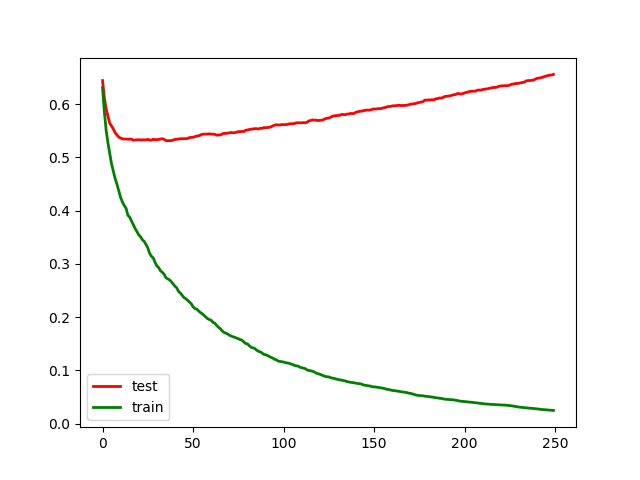

In [86]:
# Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 
# и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
learning_rate = [1, 0.5, 0.3, 0.2, 0.1] 
learning_rate = [0.2]

for rate in learning_rate:
    print('Rate', rate)
    clf = GradientBoostingClassifier(learning_rate=rate, n_estimators=250, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    
    # Вычислите и постройте график значений log-loss
    # а также найдите минимальное значение метрики и номер итерации, на которой оно достигается
    train_loss, train_min_index, train_min_loss = get_loss(clf, X_train, y_train)
    test_loss, test_min_index, test_min_loss = get_loss(clf, X_test, y_test)
    print('train_min_index', train_min_index, 'train_min_loss', train_min_loss)
    print('test_min_index', test_min_index, 'test_min_loss', test_min_loss)
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

In [87]:
    # Кривая качества на тестовой выборке идет вверх - переобучение
    print("overfitting")
    print("test_min_index 36 test_min_loss 0.531094637597")
    

overfitting
test_min_index 36 test_min_loss 0.531094637597


In [88]:
# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, 
# равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта,
# c random_state=241 и остальными параметрами по умолчанию. 
# Какое значение log-loss на тесте получается у этого случайного леса? 
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. 
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=36, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
print(round(test_loss, 2))

0.54


In [89]:
clf = RandomForestClassifier(n_estimators=250, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
print(round(test_loss, 2))
# Случайный лес выиграл у градиентного бустинга при большем количестве деревьев

0.52
